# Aula 03

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
def process_data():
    df = pd.read_csv('house_prices.csv')
    X = df.drop(columns=["SalePrice", "Id"])
    y = df["SalePrice"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X_train.select_dtypes(exclude=['object']).columns.tolist()

    # Criação de pipelines para pré-processamento
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Transformador de coluna para processamento conjunto
    pre_processor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

    # Aplicação do pré-processador nos conjuntos de treino e teste
    X_train_processed = pre_processor.fit_transform(X_train)
    X_test_processed = pre_processor.transform(X_test)

    return X_train, X_test, y_train, y_test, pre_processor

In [4]:
# função para avaliar o modelo
def metricas_regressao(estimator):
    # predições de treino
    y_train_pred = estimator.predict(X_train)
    print("\nMétricas de avaliação de treino")
    print(f"R2: { r2_score(y_train, y_train_pred):.2f}")
    print(f"MAE: { mean_absolute_error(y_train, y_train_pred):.2f}")
    print(f"RMSE: { np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")

    # predições de teste
    y_pred_test = estimator.predict(X_test)

    print("\nMétricas de avaliação de teste")
    print(f"R2: { r2_score(y_test, y_pred_test):.2f}")
    print(f"MAE: { mean_absolute_error(y_test, y_pred_test):.2f}")
    print(f"RMSE: { np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")

In [5]:
from sklearn.ensemble import AdaBoostRegressor


X_train, X_test, y_train, y_test, pre_processor = process_data()


pipe_gb = Pipeline([('pre_process', pre_processor),
                    ("gb", GradientBoostingRegressor(random_state = 55, learning_rate = 0.1, n_estimators = 100))])

pipe_gb.fit(X_train, y_train)
     

Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivA...
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('gb', GradientBoostingRegressor(random_state=55))])

In [6]:
metricas_regressao(pipe_gb)


Métricas de avaliação de treino
R2: 0.97
MAE: 9707.14
RMSE: 13252.99

Métricas de avaliação de teste
R2: 0.91
MAE: 16373.74
RMSE: 25573.23


In [7]:
from xgboost import XGBClassifier

In [8]:
def process_data():
    df = pd.read_csv('bank-full.csv')
    X = df.drop(columns=["Target"])
    y = df["Target"].apply(lambda x: 1 if x == "yes" else 0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

    # Criação de pipelines para pré-processamento
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Transformador de coluna para processamento conjunto
    pre_processor = ColumnTransformer([
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

    # Aplicação do pré-processador nos conjuntos de treino e teste
    X_train_processed = pre_processor.fit_transform(X_train)
    X_test_processed = pre_processor.transform(X_test)

    return X_train_processed, X_test_processed, y_train, y_test, X, y

In [9]:
from sklearn.metrics import classification_report

# Processamento dos dados
X_train_processed, X_test_processed, y_train, y_test, X, y = process_data()

# Treinamento do modelo XGBoost
xgb = XGBClassifier(device='gpu', n_estimators = 1000)
xgb.fit(X_train_processed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Acurácia: 0.9064435269831908
Precisão: 0.6358974358974359
Recall: 0.46880907372400754
F1-Score: 0.5397170837867247
AUC-ROC: 0.7166204506968539
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11977
           1       0.64      0.47      0.54      1587

    accuracy                           0.91     13564
   macro avg       0.78      0.72      0.74     13564
weighted avg       0.90      0.91      0.90     13564

Melhores parâmetros encontrados:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


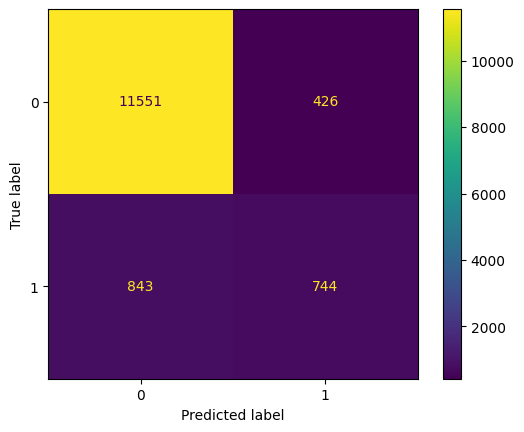

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb = XGBClassifier(device='gpu')

grid_search_xgb = GridSearchCV(estimator = xgb,
                           param_grid = param_grid_xgb,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           )

# Treinando o modelo com os melhores parâmetros encontrados
grid_search_xgb.fit(X_train_processed, y_train)

# Fazendo previsões no conjunto de teste
y_pred_xgb = grid_search_xgb.predict(X_test_processed)

# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test,y_pred_xgb)
f1 = f1_score(y_test,y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_xgb)

# Exibindo as métricas
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(classification_report(y_test, y_pred_xgb))

# Criando a matriz de confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot()

# Melhores parametros
best_params_xgb_grid = grid_search_xgb.best_params_
print("Melhores parâmetros encontrados:")
print(best_params_xgb_grid)

Acurácia: 0.9045266882925391
Precisão: 0.62106135986733
Recall: 0.47195967233774416
F1-Score: 0.5363408521303258
AUC-ROC: 0.7169016028884179
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11977
           1       0.62      0.47      0.54      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.72      0.74     13564
weighted avg       0.90      0.90      0.90     13564

Melhores parâmetros encontrados:
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 161}


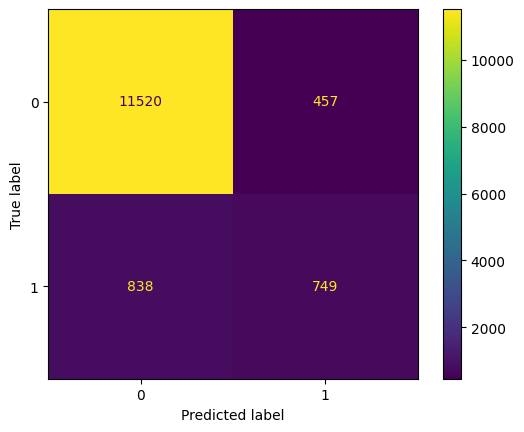

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_random = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

xgb = XGBClassifier(device='gpu')

grid_search_xgb_random = RandomizedSearchCV(estimator = xgb,
                           param_distributions = param_dist_random,
                           cv=3,
                           scoring='accuracy',
                           n_jobs=-1,
                           )

# Treinando o modelo com os melhores parâmetros encontrados
grid_search_xgb_random.fit(X_train_processed, y_train)

# Fazendo previsões no conjunto de teste
y_pred_xgb = grid_search_xgb_random.predict(X_test_processed)

# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test,y_pred_xgb)
f1 = f1_score(y_test,y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_xgb)

# Exibindo as métricas
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(classification_report(y_test, y_pred_xgb))

# Criando a matriz de confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
ConfusionMatrixDisplay(cm_xgb).plot()


# Melhores parametros
best_params_xgb_random = grid_search_xgb_random.best_params_
print("Melhores parâmetros encontrados:")
print(best_params_xgb_random)

In [13]:
df = pd.read_csv('bank-full.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [14]:
import pandas as pd

file_path = 'german_credit_data.csv'
data = pd.read_csv(file_path)

data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200} 0.71

Métricas de avaliação de treino:
[[ 65 176]
 [ 24 535]]


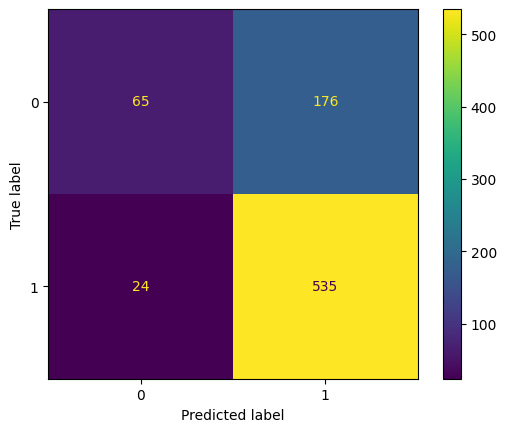

              precision    recall  f1-score   support

           0       0.73      0.27      0.39       241
           1       0.75      0.96      0.84       559

    accuracy                           0.75       800
   macro avg       0.74      0.61      0.62       800
weighted avg       0.75      0.75      0.71       800


Métricas de avaliação de teste:
[[  9  50]
 [  8 133]]


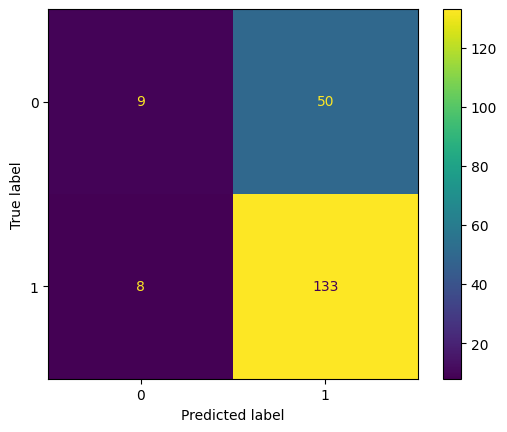

              precision    recall  f1-score   support

           0       0.53      0.15      0.24        59
           1       0.73      0.94      0.82       141

    accuracy                           0.71       200
   macro avg       0.63      0.55      0.53       200
weighted avg       0.67      0.71      0.65       200



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = data.drop(['Risk', 'Unnamed: 0'], axis=1)
y = data['Risk'].apply(lambda x: 1 if x == 'good' else 0)

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', AdaBoostClassifier(random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(best_parameters, accuracy)

# ============================================

print("\nMétricas de avaliação de treino:")
y_pred_train = grid_search.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()
print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")
y_pred_test = grid_search.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()
print(classification_report(y_test, y_pred_test))